# Feature Engineering > Feature Transfofrmation

## Outliers Handling

### Inter-Quartile Range (IQR)-->For left or right skewed data

### Importing Dependencies

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading Data

In [23]:
#load data
df1=pd.read_csv('placement.csv')
#first 5 rows
df1.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [24]:
#shape
df1.shape

(1000, 3)

In [25]:
#basic information(data-types, missing values)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


### Graphical Analysis

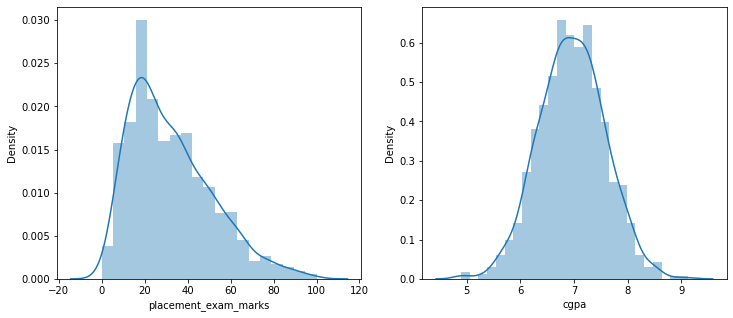

In [27]:
#distplot of 'cgpa' and 'placement_exam_marks'
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(df1['placement_exam_marks'])
plt.subplot(1,2,2)
sns.distplot(df1['cgpa'])
plt.show()
#observation-->'cgpa' is sort of normally distributed
#observation-->'placement_exam_marks' is right skewed and has right outliers

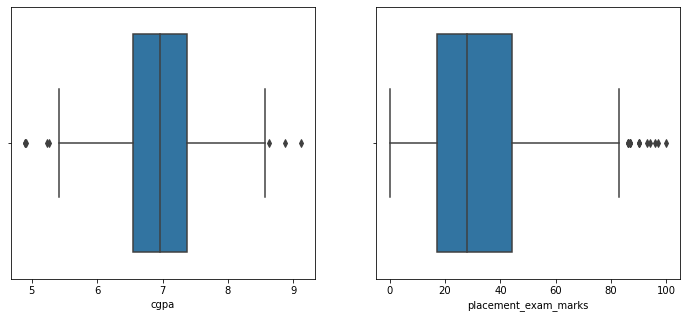

In [28]:
#boxplot of 'cgpa' and 'placement_exam_marks'
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df1['cgpa'])
plt.subplot(1,2,2)
sns.boxplot(df1['placement_exam_marks'])
plt.show()
#observation-->'cgpa' is sort of normally distributed
#observation-->'placement_exam_marks' is right skewed and has right outliers

**so here we will focus on 'placement_exam_marks' being right skewed data**

In [29]:
#'placement_exam_marks' statistical description
df1['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

### IQR (for skewed data)

In [7]:
#'placement_exam_marks' is right skewed-->IQR
q1=df1['placement_exam_marks'].quantile(0.25)
q3=df1['placement_exam_marks'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

print(lower_limit, upper_limit)

-23.5 84.5


In [32]:
#'placement_exam_marks'(right skewed distributed)-->(q1-1.5*IQR, q3+1.5*IQR)
df1[(df1['placement_exam_marks']<lower_limit) | (df1['placement_exam_marks']>upper_limit)]
#print(len(df1[(df1['placement_exam_marks']<lower_limit) | (df1['placement_exam_marks']>upper_limit)]))
#observation-->filter data having outliers(15-rows)

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


#### Trimming (remove outliers)

In [33]:
#Trimming using lower and  upper fence (q1-1.5*IQR, q3+1.5*IQR)
df2=df1.drop(df1[(df1['placement_exam_marks']<lower_limit) | (df1['placement_exam_marks']>upper_limit)].index)
df2
#observation-->985=(1000-15)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [36]:
#before trimming description of ''placement_exam_marks''
df1['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [37]:
#after trimming description of ''placement_exam_marks''
df2['cgpa'].describe()

count    985.000000
mean       6.961594
std        0.614734
min        4.890000
25%        6.550000
50%        6.960000
75%        7.370000
max        9.120000
Name: cgpa, dtype: float64

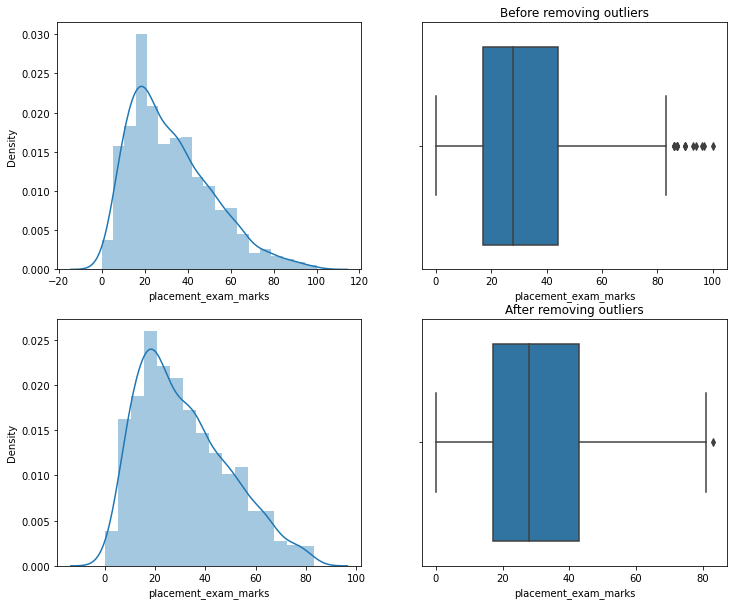

In [38]:
#distplot and boxplot of 'placement_exam_marks' before and after triming outliers

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df1['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df1['placement_exam_marks'])
plt.title("Before removing outliers", loc='center')

plt.subplot(2,2,3)
sns.distplot(df2['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(df2['placement_exam_marks'])
plt.title("After removing outliers", loc='center')

plt.show()
#observation-->one outlier is still left(maybe data cleaning is required)

#### Capping (set lower and upper bound values to outliers)

In [10]:
#Capping
print(lower_limit, upper_limit)

-23.5 84.5


In [39]:
#setting lower and upper limit values on outliers using np.where
df1['placement_exam_marks_new']=np.where(df1['placement_exam_marks']<lower_limit, lower_limit, 
                                    np.where(df1['placement_exam_marks']>upper_limit, upper_limit, df1['placement_exam_marks']))
#into array

In [43]:
#'cgpa' and 'cgpa_new' data description
df1[['placement_exam_marks', 'placement_exam_marks_new']].describe().T

,count,mean,std,min,25%,50%,75%,max
placement_exam_marks,1000.0,32.2250,19.130822,0.0,17.0,28.0,44.0,100.0
placement_exam_marks_new,1000.0,32.1365,18.865419,0.0,17.0,28.0,44.0,84.5


In [45]:
#shape(no rows are removd here, instead outliers are set to new values)
df1.shape

(1000, 4)

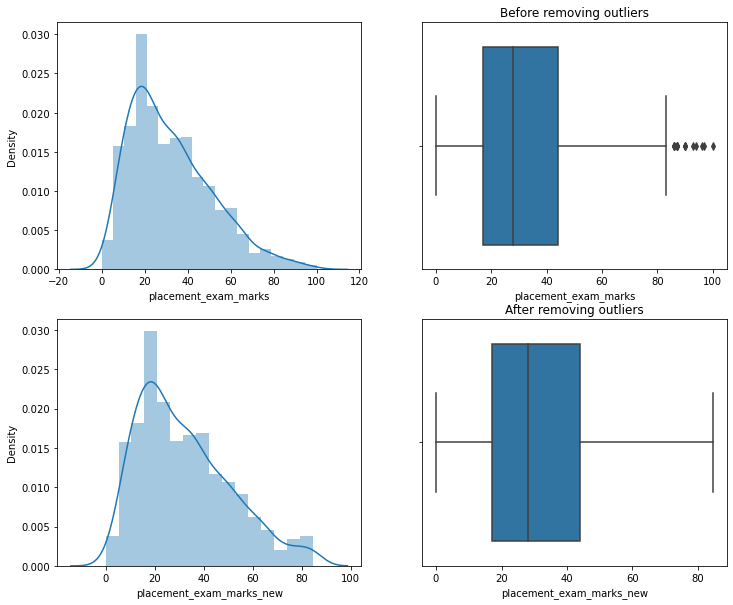

In [47]:
#distplot and boxplot of 'placement_exam_marks' before and after capping outliers

plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
sns.distplot(df1['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df1['placement_exam_marks'])
plt.title("Before removing outliers", loc='center')

plt.subplot(2,2,3)
sns.distplot(df1['placement_exam_marks_new'])
plt.subplot(2,2,4)
sns.boxplot(df1['placement_exam_marks_new'])
plt.title("After removing outliers", loc='center')

plt.show()
#observation-->'placement_exam_marks' some outliers removed

**END of Document.**